

# Project: Investigation on 5000 movies
## Table of Contents
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> **The selected dataset contains information about 5000 movies collected from 1916 to 2016 from The Movie Database (TMDb). It includes user ratings, revenues, genres, production companies, etc. Certain columns contain multiple dictionaries in one cell for example in genre and production companies. This project will focus on analyzing the popularity and profit of movies based on country of origin, year produced , production companies and genre of the movies, for axample which country produce most polular movies ? Which production company produces the most popular movies, and which one produces the movies that have high profits.**


<a id='wrangling'></a>
## 2. Data Wrangling

> **loading the data, check for cleanliness, trim and clean the dataset for analysis.**

### 2.1. General Properties

#### Importing modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import json
from collections import OrderedDict 
plt.rcParams['figure.figsize']=(14,8)

#### Loading the data

In [2]:
# Load your data 
movies_df=pd.read_csv('tmdb_5000_movies.csv')


#### Knowing number of samples and features

In [3]:
#Discovering number of samples and number of features
movies_df.shape

(4803, 20)

#### Structure of dataset

In [4]:
# Displaying top 5 lines of dataset
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
# Displaying bottom 5 lines of dataset
movies_df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


In [6]:
# Getting some sample data
movies_df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3493,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,18602,"[{""id"": 10183, ""name"": ""independent film""}, {""...",en,Morvern Callar,"Following her boyfriend's suicide, supermarket...",2.507912,"[{""name"": ""Company Pictures"", ""id"": 11842}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2002-01-01,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Morvern Callar,7.2,34
4226,1500000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,18079,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 3202, ""n...",es,Nueve Reinas,An Argentinian crime drama revolving around a ...,8.589355,"[{""name"": ""Naya Films S.A."", ""id"": 4718}, {""na...","[{""iso_3166_1"": ""AR"", ""name"": ""Argentina""}]",2000-08-31,0,114.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Sticky & Square,Nine Queens,7.4,153
4491,0,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.thehadzalastofthefirst.com/,296943,[],en,The Hadza: Last of the First,A look at human origins in the very place of o...,0.045648,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-10-31,0,70.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Hadza: Last of the First,0.0,0
1255,42000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",NaN,80278,"[{""id"": 3434, ""name"": ""thailand""}, {""id"": 6941...",en,Lo imposible,"In December 2004, close-knit family Maria, Hen...",47.559928,"[{""name"": ""Summit Entertainment"", ""id"": 491}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-09-09,180274123,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing is more powerful than the human spirit.,The Impossible,7.0,2025
170,135000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/231/The-World-Is...,36643,"[{""id"": 6731, ""name"": ""british""}, {""id"": 10364...",en,The World Is Not Enough,"Greed, revenge, world dominance and high-tech ...",39.604363,"[{""name"": ""Eon Productions"", ""id"": 7576}, {""na...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1999-11-08,361832400,128.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,As the countdown begins for the new millennium...,The World Is Not Enough,6.0,862


#### displaying more information about dataset

In [7]:
#Displaying information of dataset 
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### Displaying Nan Values for every column in dataset

In [8]:
# Finding Nan values 
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
# coverting special character to Nan Values
movies_df[movies_df['production_countries']=='[]']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
272,90000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,24113,"[{""id"": 2301, ""name"": ""architect""}, {""id"": 345...",en,Town & Country,Porter Stoddard is a well-known New York archi...,1.004579,"[{""name"": ""New Line Cinema"", ""id"": 12}]",[],2001-04-27,10372291,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,There's no such thing as a small affair.,Town & Country,3.7,16
1011,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,53953,"[{""id"": 10292, ""name"": ""gore""}, {""id"": 12339, ...",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
1360,0,"[{""id"": 18, ""name"": ""Drama""}]",http://therebedragonsmovie.com/,45054,"[{""id"": 5509, ""name"": ""spanish civil war""}, {""...",en,There Be Dragons,Arising out of the horror of the Spanish Civil...,6.668679,[],[],2011-03-25,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,There Be Dragons,5.9,27
1511,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10751, ""n...",NaN,12920,"[{""id"": 643, ""name"": ""horse race""}, {""id"": 267...",en,Dreamer: Inspired By a True Story,Ben Crane believes that a severely injured rac...,6.048743,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...",[],2005-09-10,0,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Dreamer: Inspired By a True Story,6.3,67
1898,26000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,18147,"[{""id"": 65, ""name"": ""holiday""}]",en,Unaccompanied Minors,Five disparate kids snowed in at the airport o...,10.006282,[],[],2006-12-08,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"No plane, no parents, no problem!",Unaccompanied Minors,5.4,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4784,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.thepuffychairmovie.com,24055,"[{""id"": 171993, ""name"": ""mumblecore""}]",en,The Puffy Chair,Josh's life is pretty much in the toilet. He's...,1.243955,[],[],2005-01-17,0,85.0,[],Released,NaN,The Puffy Chair,6.2,15
4787,0,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,86304,"[{""id"": 9715, ""name"": ""superhero""}]",en,All Superheroes Must Die,"Masked vigilantes Charge (Jason Trost), Cutthr...",3.545991,"[{""name"": ""Grindfest"", ""id"": 18818}]",[],2011-10-26,0,78.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Man Win,All Superheroes Must Die,4.2,13
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2


**Since there are other special character in dataset as [] this have to be changed to Nan values since they contain nothing for my analysis.**



### 2.2. Data Cleaning 

#### Deleting unnecessary columns


In [10]:
# dropping some column
movies_df.drop(['homepage','id','keywords','overview','tagline','spoken_languages'],axis = 1,inplace=True)
# displaying info
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 525.5+ KB


**The droped columns contais many Nan Values and others will not be used in dataset, I removed them to get a clean dataset** 

#### Repacing special character with Nan

In [11]:
#Replacing [] character with Nan
movies_df.replace('[]', np.nan,inplace=True)

# displaying Nan values for each column
movies_df.isnull().sum()

budget                    0
genres                   28
original_language         0
original_title            0
popularity                0
production_companies    351
production_countries    174
release_date              1
revenue                   0
runtime                   2
status                    0
title                     0
vote_average              0
vote_count                0
dtype: int64

**More Nan Values have been found since there was some columns with only [] characters with is repaced by Nan**

#### Droping Nan Values

In [12]:
# Dropping Nans
movies_df.dropna(inplace=True)

# displaying Nan values for each column
movies_df.isna().sum()

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

**There is no Nan Values in my dataset**

#### New shape of modified dataset

In [13]:
# new shape
movies_df.shape

(4429, 14)

#### Getting every production companies for each movie

In [14]:
"""
The following loop will extract only production companies for each movie from
dictionaries containing lots of details of every production company for every movie

"""
# Initializing a list of production companies name 
Campany_names=[]
# looping trough production companies columns
for name in  movies_df['production_companies']:
    # converting object dictionaries into editable dictionaries
    dict_name=json.loads(name)
    #Initializing a list of each
    campany_name=[]
    #appending the names into production names
    Campany_names.append(campany_name)
    
    #Looping through each dictionary for every production company
    for i in dict_name:
        # appending each production film in its list
        campany_name.append(list(i.values())[0])
        



#### Getting every country of origin for each movie

In [15]:
"""
The loop will extract only the original country of the movie from 
a details dictionary with original country with other detail.
"""
# Initializing the original country list
country_original=[]

#Looping through production countries columns
for country in movies_df['production_countries']:
    # extracting only country of original in the dictionary object
    country_original.append(country.split('"')[7])
    
    

#### Getting every country of origin for each movie

In [16]:
"""
The following loop will extract only genre for each movie from
dictionaries containing lots of details of every genre company for every movie

"""
# creating a genre list
genre_names=[]
#Looping the genres column
for genre in  movies_df['genres']:
    # converting object dictionaries into editable dictionaries
    dict_name_genre=json.loads(genre)
    
    #Initializing a list of each genre
    names=[]
    #appending the genre into genre list
    genre_names.append(names)
    #Looping through each dictionary for every genre
    for k in dict_name_genre:
        # extracting only genre the dictionary 
        names.append(list(k.values())[1])
        

#### Creating a profit column

In [17]:
# creating a profit column from revenue and budget
movies_df['profit']=movies_df['revenue']-movies_df['budget']

#### Creating profit or loss status column

In [18]:
"""
The loop will create a profit or loss status based on the profite or loss made
"""

# Initializing list of profit/ loss status
Loss_profit_status=[]

#looping through profit column
for profit in movies_df['profit']:
    
    # definning the profit
    if profit>=0:
        Loss_profit_status.append('Profit')
    # definning the loss
    else:
        Loss_profit_status.append('Loss')
        
        

In [19]:
# creating profit/loss status for every data
movies_df['P/L status']=Loss_profit_status

#### Creating cleaned columns

In [20]:
# creating cleaned genre column
movies_df['genre_names']=genre_names
#creating cleaned production company column
movies_df['production_company']=Campany_names
#creating country of origin column
movies_df['country_original']=country_original

In [21]:
#Chwcking for the new added column
movies_df.head()

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,profit,P/L status,genre_names,production_company,country_original
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,2550965087,Profit,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",United States of America
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,661000000,Profit,"[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films...",United States of America
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,635674609,Profit,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]",United Kingdom
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,834939099,Profit,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...",United States of America
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,24139100,Profit,"[Action, Adventure, Science Fiction]",[Walt Disney Pictures],United States of America


In [22]:
# dropping old uncleaned columns
movies_df.drop(['genres','production_countries','production_companies'],axis = 1,inplace=True)

In [23]:
# Converting date into datetime for easy manipulation
movies_df['release_date']=pd.to_datetime(movies_df['release_date'])


In [24]:
#Checking for information for new cleaned data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429 entries, 0 to 4802
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   budget              4429 non-null   int64         
 1   original_language   4429 non-null   object        
 2   original_title      4429 non-null   object        
 3   popularity          4429 non-null   float64       
 4   release_date        4429 non-null   datetime64[ns]
 5   revenue             4429 non-null   int64         
 6   runtime             4429 non-null   float64       
 7   status              4429 non-null   object        
 8   title               4429 non-null   object        
 9   vote_average        4429 non-null   float64       
 10  vote_count          4429 non-null   int64         
 11  profit              4429 non-null   int64         
 12  P/L status          4429 non-null   object        
 13  genre_names         4429 non-null   object      

#### Checking unique Values in Movie status 

In [25]:
# checking the status unique values
movies_df['status'].unique()

array(['Released', 'Rumored'], dtype=object)

#### Removing outliers

In [26]:
# selecting released movies
movies_df=movies_df[movies_df['status']=='Released']

**I removed the rumored movies in my dataset because it is not logical to know the revenue of the unrealised movies. Therefore I remained with only released movies**

<a id='eda'></a>
## Exploratory Data Analysis




#### Stastical analysis

In [27]:
# stastical analysis of data
movies_df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,profit
count,4.427000e+03,4427.000000,4.427000e+03,4427.000000,4427.000000,4427.000000,4.427000e+03
mean,3.139422e+07,23.184470,8.918173e+07,108.246216,6.178993,747.501694,5.778751e+07
std,4.154151e+07,32.577603,1.678161e+08,20.929225,1.024830,1269.530348,1.406690e+08
min,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08
25%,2.500000e+06,6.236937,6.000000e+00,94.000000,5.700000,79.000000,-1.298568e+06
50%,1.700000e+07,14.730796,2.560502e+07,105.000000,6.300000,284.000000,6.154592e+06
75%,4.183885e+07,29.986632,1.015800e+08,118.000000,6.800000,824.500000,6.305509e+07
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09


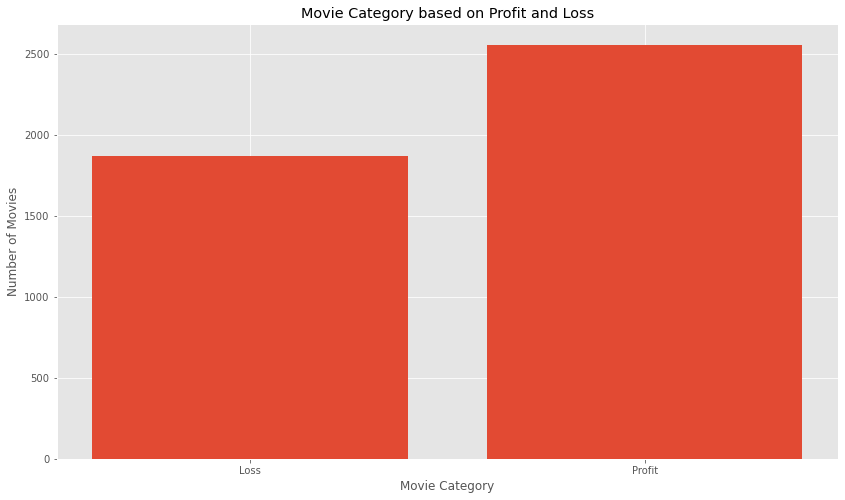

In [28]:
loss=movies_df[movies_df['profit']<=0]
loss_profit= {'Loss':len(loss),'Profit':len(movies_df)-len(loss)}
plt.bar(loss_profit.keys(),loss_profit.values())
plt.title('Movie Category based on Profit and Loss')
plt.xlabel('Movie Category')
plt.ylabel('Number of Movies')
plt.show()

#### Popularity based on Loss and profit

In [29]:
# Average popularity of movies which have loss
pop_mean_loss=movies_df.groupby('P/L status').get_group('Loss').mean()['popularity']

# Average popularity of movies which have profit
pop_mean_prof = movies_df.groupby('P/L status').get_group('Profit').mean()['popularity']

In [30]:
# Popularity of profit and loss movies dictionary
loss_profit_popularity={'Popularity based on movies with loss':pop_mean_loss,
                        'Popularity based on movies with Profit':pop_mean_prof}


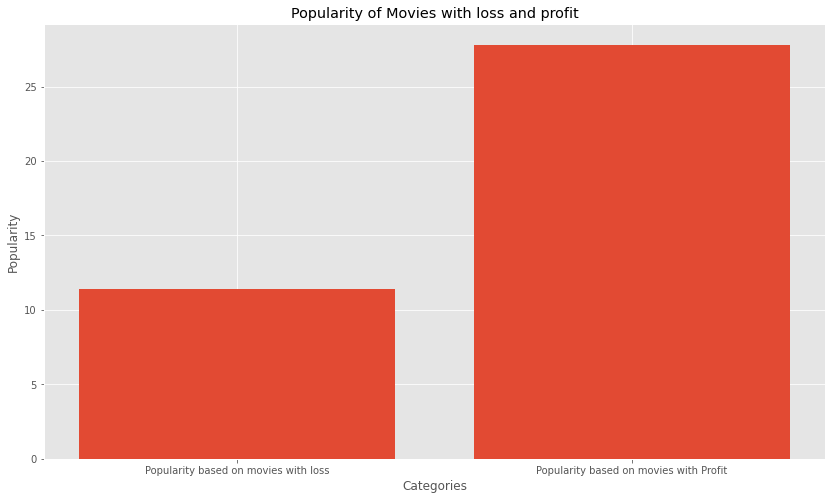

In [31]:
#ploting the graph
plt.bar(loss_profit_popularity.keys(),loss_profit_popularity.values())
plt.title('Popularity of Movies with loss and profit')
plt.xlabel('Categories')
plt.ylabel('Popularity')
plt.show()

### Research Question 1 : How countries are ranked in producing popular movies ?

#### Selecting countries with at least 10 movies in dataset

In [32]:
# Selecting countries with at least 10 movies in dataset
country_original=pd.DataFrame(movies_df['country_original'].explode().value_counts())['country_original'].head(22)

country_original

United States of America    2965
United Kingdom               360
Canada                       211
Germany                      196
France                       166
Australia                     86
China                         37
India                         35
Japan                         34
Spain                         33
Italy                         24
Ireland                       22
Hong Kong                     22
New Zealand                   21
Mexico                        21
Belgium                       17
Czech Republic                17
Denmark                       14
South Korea                   13
Brazil                        12
Russia                        11
Switzerland                   10
Name: country_original, dtype: int64

**There are 22 countries with more than 10 movies in the dataset. with United State of America ranking the first and United Kingdom the second.**


#### Popularity mean for each country with more than 10 movies

In [33]:
'''
The loop below will calculate the mean popularity by country
'''
mean_popularity=[]
for i in country_original.index:
    mean_popularity.append(movies_df[movies_df['country_original']==i]['popularity'].mean())
    
# creating average popularity by country dictionary   
means_by_country=dict(zip(country_original.index,mean_popularity))
#Sorting the means from big to small
means_by_country = OrderedDict(sorted(means_by_country.items(), key=lambda x: x[1],reverse=True))


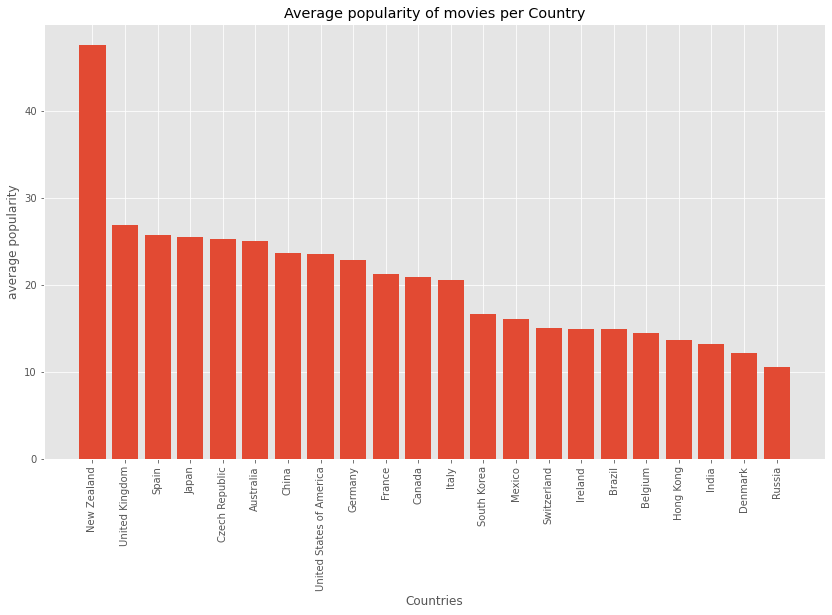

In [34]:
plt.bar(means_by_country.keys(),means_by_country.values())
plt.xticks(rotation=90);
plt.title('Average popularity of movies per Country')
plt.xlabel('Countries')
plt.ylabel('average popularity')
plt.show()

**From the graph above, movies from New Zeland are most popular and are much ahead than others around 50 of popularity index, the second is United Kingdom with around 27, followed by Spain and Japan. The united State of America occupy the 8th position while Denmark and Russia movies occupy the 21st and 22nd places respectively. Another insight is that despite having a lot of movies in the dataset, United State of America movies are not popular as expect, therefore the popularity index do not deppends on how much movies are produced in your country.**

### Research Question 2 : which period in which popular movies were produced?

#### Sorting movies based on release date

In [35]:
movies_df=movies_df.sort_values('release_date')
movies_df

,budget,original_language,original_title,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,profit,P/L status,genre_names,production_company,country_original
4592,385907,en,Intolerance,3.232447,1916-09-04,8394751,197.0,Released,Intolerance,7.4,60,8008844,Profit,[Drama],"[Triangle Film Corporation, Wark Producing Corp.]",United States of America
4661,245000,en,The Big Parade,0.785744,1925-11-05,22000000,151.0,Released,The Big Parade,7.0,21,21755000,Profit,"[Drama, Romance, War]",[Metro-Goldwyn-Mayer (MGM)],United States of America
2638,92620000,de,Metropolis,32.351527,1927-01-10,650422,153.0,Released,Metropolis,8.0,657,-91969578,Loss,"[Drama, Science Fiction]","[Paramount Pictures, Universum Film (UFA)]",Germany
4457,0,de,Die Büchse der Pandora,1.824184,1929-01-30,0,109.0,Released,Pandora's Box,7.6,45,0,Profit,"[Drama, Thriller, Romance]",[Nero Films],Germany
4594,379000,en,The Broadway Melody,0.968865,1929-02-08,4358000,100.0,Released,The Broadway Melody,5.0,19,3979000,Profit,"[Drama, Music, Romance]",[Metro-Goldwyn-Mayer (MGM)],United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,20000000,en,Hands of Stone,7.444189,2016-08-26,0,105.0,Released,Hands of Stone,6.1,109,-20000000,Loss,[Drama],"[Weinstein Company, The, La Piedra Films, Fueg...",Panama
4036,35000000,en,Antibirth,3.674294,2016-09-02,0,94.0,Released,Antibirth,4.8,40,-35000000,Loss,[Horror],"[Hideaway Pictures, Traverse Media, Culminatio...",United States of America
4720,8500000,en,The Birth of a Nation,9.452808,2016-09-09,15861566,120.0,Released,The Birth of a Nation,6.5,178,7361566,Profit,[Drama],"[Phantom Four, Mandalay Pictures, Bron Studios...",United States of America
3249,0,en,Kicks,3.467923,2016-09-09,0,80.0,Released,Kicks,7.5,18,0,Profit,[Adventure],"[Bystorm Films, Animal Kingdom, Bow and Arrow ...",United States of America


#### Definning period range

In [36]:
# movies released before 1949
range_df1 = ( movies_df['release_date'] >= '1916-09-04') & (movies_df['release_date']  <= '1949-12-31')

# movies released between 1950 to 1999
range_df2=( movies_df['release_date'] >= '1950-01-01') & (movies_df['release_date']  <= '1999-12-31')

# movies released between 2000 to 2010
range_df3 = ( movies_df['release_date'] >= '2000-01-01') & (movies_df['release_date']  <= '2009-12-31')

# movies released after 2010
range_df4 = ( movies_df['release_date'] >= '2010-01-01') & (movies_df['release_date']  <= '2022-12-31'),


In [37]:
# movies released period dictionary
period_data={'before 1950':movies_df.loc[range_df1]['popularity'].mean(),
             'between 1950-2000':movies_df.loc[range_df2] ['popularity'].mean(),
             'between 2000-2010':movies_df.loc[range_df3]['popularity'].mean(),
             'after 2010':movies_df.loc[range_df4]['popularity'].mean()}
period_data

{'before 1950': 13.936031066666667,
 'between 1950-2000': 19.036122541010773,
 'between 2000-2010': 19.79205343494624,
 'after 2010': 32.107002219011406}

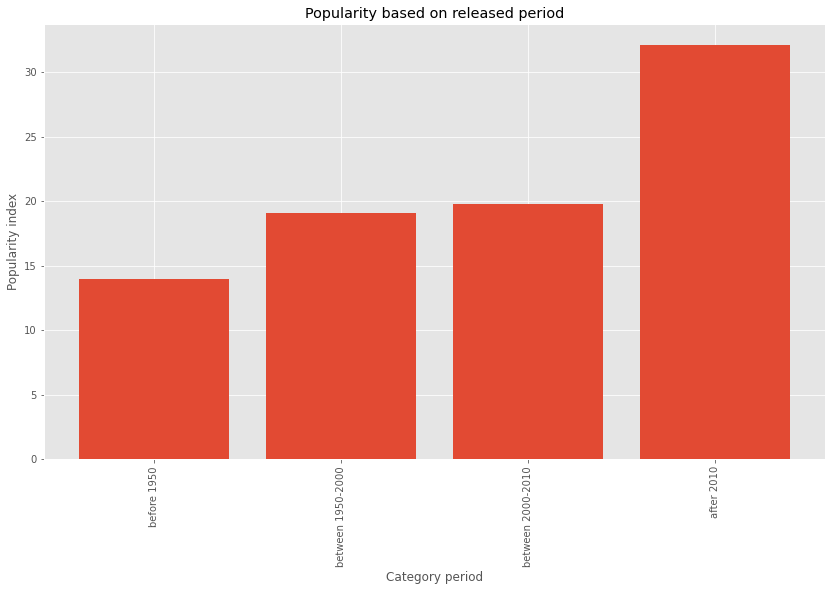

In [38]:
plt.bar(period_data.keys(),period_data.values())
plt.title('Popularity based on released period')
plt.xlabel('Category period')
plt.ylabel('Popularity index')
plt.xticks(rotation=90);
plt.show()


**Bar graph shows that the movies popularity increased as the time goes on. The movies average popularity of movies before 1950 is around 14 while the ones between 1950 to 2000 have average popularity around 19 while the ones from 2000 to 2010  have average popularity around 20 while the ones after 2010 are more popular with average popularity 33 of popularity index.**


### Research Question 3 : Which production companies have most popular movies ?

#### Creating top 30 movies production companies in dataset with average popularity of their movies

In [39]:
"""
The loop will Create top 30 movies production companies in dataset with average popularity of their movies
"""

production_mean=[]
for i in pd.DataFrame(movies_df['production_company'].explode())['production_company'].value_counts().head(30).index:
    production_mean.append(movies_df[movies_df['production_company'].str.contains(i,regex=False)]['popularity'].mean())
    
# top 30 movies production companies dictionary   
production_mean_dict=dict(zip(pd.DataFrame(movies_df['production_company'].explode())['production_company'].value_counts().head(30).index,production_mean))
production_mean_dict = OrderedDict(sorted(production_mean_dict.items(), key=lambda x: x[1],reverse=True))
production_mean_dict

OrderedDict([('Amblin Entertainment', 47.51972583673469),
             ('Walt Disney Pictures', 43.310791876106194),
             ('Summit Entertainment', 41.46614390384615),
             ('Dune Entertainment', 38.89317925423729),
             ('Village Roadshow Pictures', 38.39371525925926),
             ('Warner Bros.', 36.247154263322884),
             ('Lionsgate', 35.22953926785714),
             ('Twentieth Century Fox Film Corporation', 33.85089831081081),
             ('Relativity Media', 31.68398799019607),
             ('Universal Pictures', 31.55245160967742),
             ('Columbia Pictures', 31.421506597014925),
             ('Paramount Pictures', 30.385787207017543),
             ('DreamWorks SKG', 30.00171408974359),
             ('New Regency Pictures', 29.4139214),
             ('Working Title Films', 29.15677835849056),
             ('Fox 2000 Pictures', 28.18877576363636),
             ('New Line Cinema', 27.924684091463412),
             ('Regency Enterprises', 27.

#### Movies production companies with their average popularity

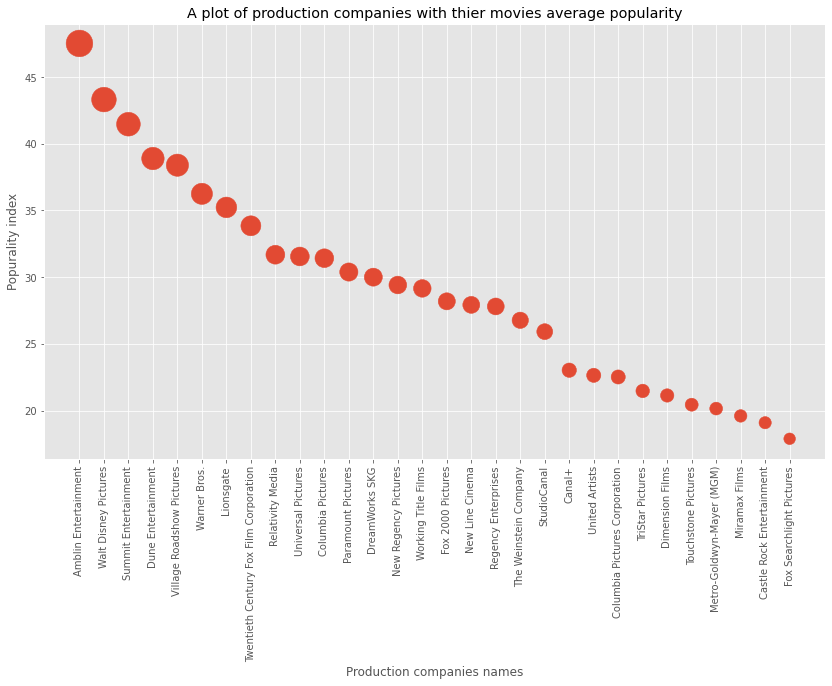

In [40]:
z=production_mean_dict.keys()
y=production_mean_dict.values()
n=production_mean_dict.keys()
fig,ax=plt.subplots()
ax.scatter(z,y,s=[i**1.7 for i in list(y)])
plt.title('A plot of production companies with thier movies average popularity')
plt.xlabel('Production companies names')
plt.ylabel('Popurality index')
plt.xticks(rotation=90);
plt.show()


**The scatter plot above shows how the production companies produce popular movies. The movies from Amblin Entertainment occupies the first place around 47 popularity index, followed by Walt Disney Pictures, Summit Entertainment occupies the third place and Dune Pictures occupies the fourth place while Village Roadshow Pictures occupies the fifth place . In the top thirty the 30th is Fox Searchlight Pictures**


### Research Question 4 : Which genre of the movies are most popular ?

#### Getting the average popularity of each genre movies

In [41]:
"""
The loop is going to get every genre of the movie and their average popularity index
"""
Genre_means=[]
for genre in pd.DataFrame(movies_df['genre_names'].explode())['genre_names'].value_counts().index:
    Genre_means.append(movies_df[movies_df['genre_names'].str.contains(genre,regex=False)]['popularity'].mean())
    
# average genre popularity index  dictionary
Genre_means_dict=dict(zip(pd.DataFrame(movies_df['genre_names'].explode())['genre_names'].value_counts().index,Genre_means))
Genre_means_dict = OrderedDict(sorted(Genre_means_dict.items(), key=lambda x: x[1],reverse=True))
Genre_means_dict


OrderedDict([('Adventure', 40.022213994832036),
             ('Animation', 39.30202294805195),
             ('Science Fiction', 37.532599949903656),
             ('Fantasy', 37.04356345432692),
             ('Action', 32.03698656834532),
             ('Family', 28.971218751527495),
             ('Thriller', 25.507213375205257),
             ('Mystery', 25.128864323529413),
             ('War', 24.09604402112676),
             ('Crime', 23.43035849187592),
             ('Comedy', 19.64457378192162),
             ('Horror', 19.39194707802875),
             ('Drama', 19.18519478605313),
             ('Western', 18.461373567901234),
             ('History', 17.899342136125657),
             ('Romance', 17.142549088484845),
             ('Music', 13.560474711864407),
             ('TV Movie', 7.140965571428572),
             ('Documentary', 5.812743071428572),
             ('Foreign', 0.967619611111111)])

#### Ploting the bar graphs

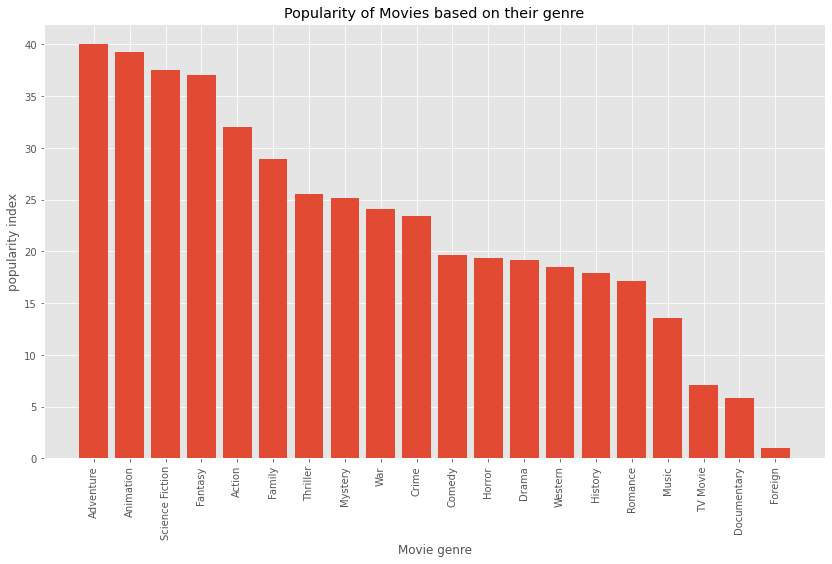

In [42]:
plt.bar(Genre_means_dict.keys(),Genre_means_dict.values())
plt.title('Popularity of Movies based on their genre')
plt.xlabel('Movie genre')
plt.xticks(rotation=90)
plt.ylabel('popularity index')
plt.show()

**From bar graph above, the adventure movies are most popular movies, followed by Animation, Science Fiction, Fantasy and then Action. Documentary movies and Foreign movies occupy the last two places.**


### Research Question 5  : How countries are ranked in based on average profit of their movies ?

In [43]:
"""
This loop will get the average profit for movies produced in certain Countries
"""
mean_popularity=[]
for i in country_original.index:
    mean_popularity.append(movies_df[movies_df['country_original']==i]['profit'].mean())
    
    
means_by_country=dict(zip(country_original.index,mean_popularity))
means_by_country = OrderedDict(sorted(means_by_country.items(), key=lambda x: x[1],reverse=True))
means_by_country


OrderedDict([('New Zealand', 270077563.95238096),
             ('Japan', 90925710.0),
             ('China', 82604548.48648648),
             ('United Kingdom', 71660680.28055556),
             ('United States of America', 62913271.694435075),
             ('Czech Republic', 54085828.23529412),
             ('Australia', 45453358.03488372),
             ('Germany', 45189326.89795918),
             ('India', 38729338.428571425),
             ('Italy', 33479999.208333332),
             ('Canada', 32734174.047393367),
             ('France', 27326890.277108435),
             ('Spain', 26967893.454545453),
             ('Hong Kong', 26503358.636363637),
             ('Mexico', 21919210.095238097),
             ('Ireland', 8799116.0),
             ('Brazil', 8135280.666666667),
             ('South Korea', 6224687.384615385),
             ('Belgium', 1862752.6470588236),
             ('Denmark', -2787057.0),
             ('Russia', -3549098.4545454546),
             ('Switzerland', -1177949

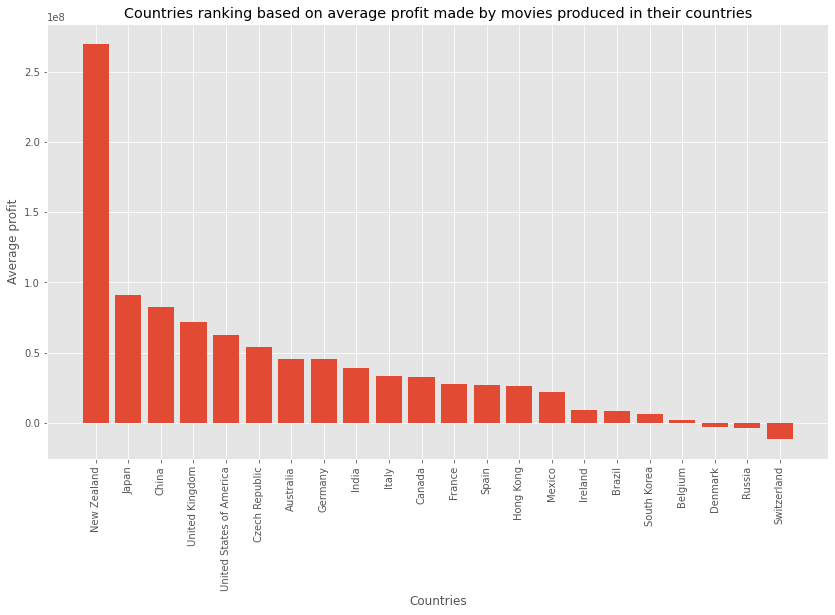

In [44]:

plt.bar(means_by_country.keys(),means_by_country.values())
plt.title('Countries ranking based on average profit made by movies produced in their countries')
plt.xlabel('Countries')
plt.ylabel('Average profit')
plt.xticks(rotation=90)
plt.show()

**Movies from New Zealand made most of the profit based on average , followed by Japan, China,United Kingdom and USA. Movies from Denmark, Russia and Switzerland are in losses**


### Research Question 5  : How movie genre are ranked in based on average profit of  made?



In [45]:
"""
The loop will get the average profit made by each genre of the movie
"""
Genre_means=[]
for genre in pd.DataFrame(movies_df['genre_names'].explode())['genre_names'].value_counts().index:
    Genre_means.append(movies_df[movies_df['genre_names'].str.contains(genre,regex=False)]['profit'].mean())
    
    

Genre_means_dict=dict(zip(pd.DataFrame(movies_df['genre_names'].explode())['genre_names'].value_counts().index,Genre_means))
Genre_means_dict = OrderedDict(sorted(Genre_means_dict.items(), key=lambda x: x[1],reverse=True))
Genre_means_dict

OrderedDict([('Animation', 161450279.92640692),
             ('Adventure', 145317565.97545218),
             ('Fantasy', 132344290.8125),
             ('Family', 116717133.75763747),
             ('Science Fiction', 103739185.9884393),
             ('Action', 93149627.50089929),
             ('Thriller', 51367304.52545156),
             ('Comedy', 50153200.208596714),
             ('War', 49561774.873239435),
             ('Mystery', 48685533.26764706),
             ('Romance', 43105553.16969697),
             ('Crime', 39361804.14475628),
             ('Drama', 34293625.65227704),
             ('Music', 34066261.79096045),
             ('Horror', 30902223.147843942),
             ('History', 28573205.130890053),
             ('Western', 19403895.185185187),
             ('Documentary', 10876810.028571429),
             ('Foreign', -533369.2777777778),
             ('TV Movie', -1314285.7142857143)])

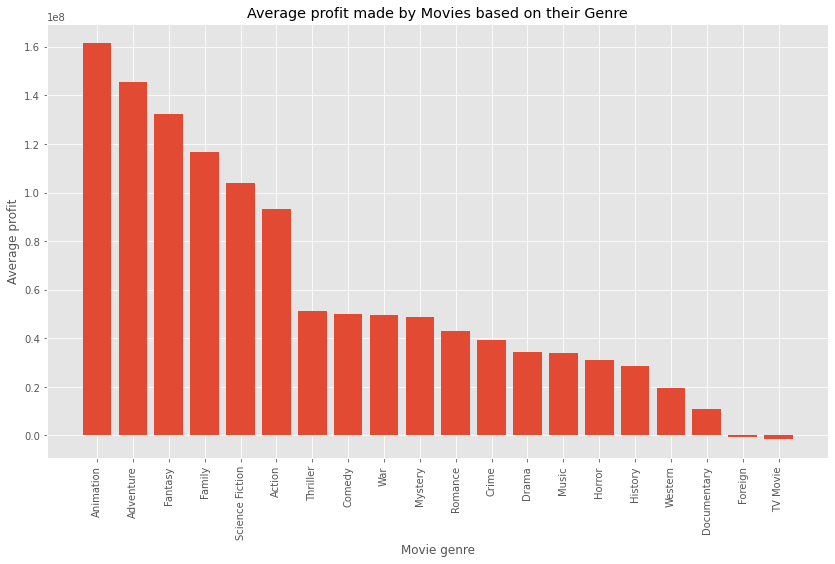

In [46]:
plt.bar(Genre_means_dict.keys(),Genre_means_dict.values())
plt.title('Average profit made by Movies based on their Genre')
plt.xlabel('Movie genre')
plt.ylabel('Average profit')
plt.xticks(rotation=90);
plt.show()

**From the plot, Animation movies have high average profit, the second is Adventure and Fantasy as the third. Foreign Movies and Tv Movies have average losses**


<a id='conclusions'></a>
## Conclusions

- **The movies popularity increased as the time goes on. The average popularity of movies before 1950 is around 14 while the ones between 1950 to 2000 have average popularity around 19 while the ones from 2000 to 2010  have average popularity around 20 while the ones after 2010 are more popular with average popularity 33 of popularity index.**
- **Movies from New Zealand made most of the profit based on average , followed by Japan, China,United Kingdom and USA. Movies from Denmark, Russia and Switzerland are in losses**
- **The adventure movies are most popular movies, followed by Animation, Science Fiction, Fantasy and then Action. Documentary movies and Foreign movies occupy the last two places.**
- **The movies from Amblin Entertainment occupies the first place around 47 popularity index, followed by Walt Disney Pictures, Summit Entertainment occupies the third place and Dune Pictures occupies the fourth place while Village Roadshow Pictures occupies the fifth place . In the top thirty the 30th is Fox Searchlight Pictures**

- **The movies from New Zeland are most popular and are much ahead than others around 50 of popularity index, the second is United Kingdom with around 27, followed by Spain and Japan. The united State of America occupy the 8th position while Denmark and Russia movies occupy the 21st and 22nd places respectively. Another insight is that despite having a lot of movies in the dataset, United State of America movies are not popular as expected, therefore the popularity of the movie do not deppend on how much movies are produced in the country.**
